In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# 온라인 쇼핑몰 고객 데이터 (가상)
customer_data = {
    '고객ID': [1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010],
    '이름': ['김민수', '이지영', '박철호', '정수민', '최영희', '강도현', '윤서연', '임태혁', '송지원', '한미래'],
    '나이': [25, 32, 28, 35, 29, 31, 26, 33, 27, 30],
    '성별': ['남', '여', '남', '여', '여', '남', '여', '남', '여', '여'],
    '구매금액': [50000, 75000, 32000, 98000, 67000, 84000, 41000, 72000, 58000, 89000],
    '구매횟수': [3, 5, 2, 7, 4, 6, 2, 5, 3, 6],
    '회원등급': ['실버', '골드', '브론즈', '플래티넘', '골드', '골드', '실버', '골드', '실버', '플래티넘']
}

df = pd.DataFrame(customer_data)

In [20]:
df.columns
df['성별'].value_counts()
print('\n2. 구매금액이 70000원 이상인 고객:')
mask = (df['구매금액'] >= 70000) & (df['성별'] == '여')
df[mask]



2. 구매금액이 70000원 이상인 고객:


,고객ID,이름,나이,성별,구매금액,구매횟수,회원등급
1,1002,이지영,32,여,75000,5,골드
3,1004,정수민,35,여,98000,7,플래티넘
9,1010,한미래,30,여,89000,6,플래티넘


In [21]:
# 실습: 매출 데이터 그룹별 분석
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 매출 데이터 생성
np.random.seed(42)

# 날짜 생성 (2023년 전체)
dates = pd.date_range('2023-01-01', '2023-12-31')
n_records = 500

data = {
    '주문ID': np.arange(1001, 1001 + n_records),
    '주문일자': np.random.choice(dates, n_records),
    '고객ID': np.random.choice([f'CUST{i:03d}' for i in range(1, 101)], n_records),
    '상품ID': np.random.choice([f'PROD{i:03d}' for i in range(1, 51)], n_records),
    '카테고리': np.random.choice(['전자제품', '의류', '가구', '식품', '화장품', '도서', '스포츠'], n_records),
    '매출액': np.random.randint(10000, 500000, n_records),
    '수량': np.random.randint(1, 10, n_records),
    '지역': np.random.choice(['서울', '부산', '인천', '대구', '광주', '대전', '울산', '경기', '강원'], n_records),
    '결제방법': np.random.choice(['신용카드', '현금', '체크카드', '휴대폰', '계좌이체'], n_records),
    '고객등급': np.random.choice(['일반', '실버', '골드', 'VIP'], n_records)
}

df = pd.DataFrame(data)

In [ ]:
# 검색후 하기
# 날짜 정보 추출 -> 컬럼 추가 ['주문년월', '요일', '주'(1년중 몇번째 주)]
# 날짜 형식으로 변환 (필요 시)
df['주문일자'] = pd.to_datetime(df['주문일자'])

# '주문년월' (예: '2023-01')
df['주문년월'] = df['주문일자'].dt.to_period('M').astype(str)

# '요일' (예: '월', '화' 등 한글 요일)
df['요일'] = df['주문일자'].dt.day_name(locale='ko_KR')  # 한글 요일 출력 (로케일 설정 가능 시)
# 로케일 설정이 안 될 경우 대안:
# df['요일'] = df['주문일자'].dt.weekday.map(['월', '화', '수', '목', '금', '토', '일'])

# '주' (1년 중 몇 번째 주)
df['주'] = df['주문일자'].dt.isocalendar().week  # isocalendar()는 연도, 주차, 요일 포함된 DataFrame 반환

# 결과 확인
print(df[['주문일자', '주문년월', '요일', '주']].head())

        주문일자     주문년월   요일   주
0 2023-04-13  2023-04  목요일  15
1 2023-12-15  2023-12  금요일  50
2 2023-09-28  2023-09  목요일  39
3 2023-04-17  2023-04  월요일  16
4 2023-03-13  2023-03  월요일  11


In [72]:
df.groupby('주')['매출액'].sum().sort_values(ascending= False).head(10)
df.groupby('주')['매출액'].sum().nlargest(10)

주
8     4689983
27    4467802
14    4330412
19    4196672
23    3771165
31    3730343
15    3668608
21    3616903
52    3569033
25    3454539
Name: 매출액, dtype: int32

In [28]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [76]:
df.groupby('주')['매출액'].sum().sort_values(ascending=False)

주
8     4689983
27    4467802
14    4330412
19    4196672
23    3771165
31    3730343
15    3668608
21    3616903
52    3569033
25    3454539
37    3375886
50    3354545
7     3313923
49    3308152
29    3291665
42    3201310
39    3085667
46    2998060
9     2898753
36    2894343
40    2869975
16    2869527
44    2698092
33    2467888
18    2462466
47    2454792
28    2382578
32    2286155
6     2250272
38    2242428
4     2232358
5     2203467
22    2092128
45    2066284
34    2011473
41    1901637
17    1833616
3     1796731
2     1796630
1     1693663
51    1593366
43    1574426
20    1560857
10    1507064
30    1433951
35    1325247
24    1288969
13    1202273
48     793539
26     684677
11     534285
12     405797
Name: 매출액, dtype: int32

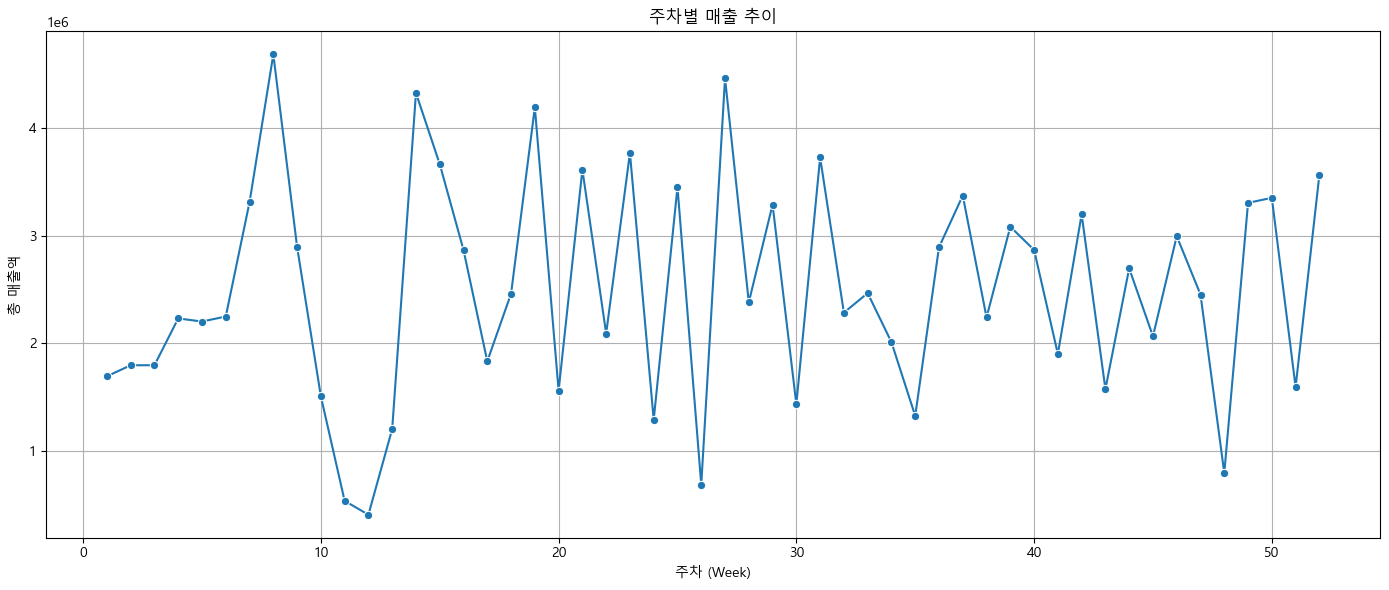

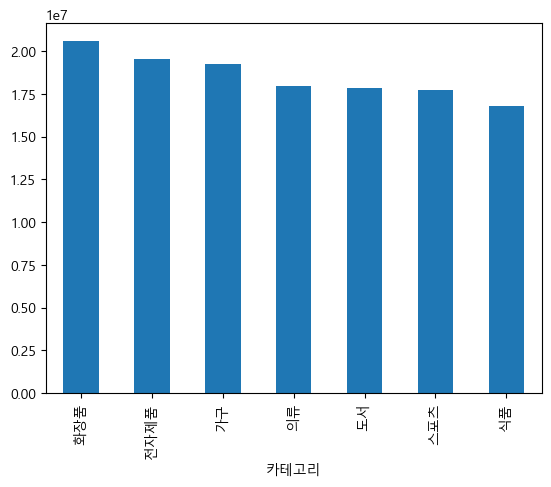

In [73]:
weekly_sales = df.groupby('주')['매출액'].sum().reset_index()

# 시각화
plt.figure(figsize=(14, 6))
sns.lineplot(data=weekly_sales, x='주', y='매출액', marker='o')
plt.title('주차별 매출 추이')
plt.xlabel('주차 (Week)')
plt.ylabel('총 매출액')
plt.grid(True)
plt.tight_layout()
plt.show()
category_sum = df.groupby('카테고리')['매출액'].sum().sort_values(ascending = False)
category_sum.plot(kind = 'bar')
plt.show()


In [ ]:

df.columns
df['단가'] = df['매출액']/df['수량']
df

,주문ID,주문일자,고객ID,상품ID,카테고리,매출액,수량,지역,결제방법,고객등급,주문년월,요일,주,단가
0,1001,2023-04-13,CUST002,PROD011,식품,384899,4,대구,현금,골드,2023-04,목요일,15,96224.750000
1,1002,2023-12-15,CUST092,PROD004,도서,66985,7,대전,체크카드,VIP,2023-12,금요일,50,9569.285714
2,1003,2023-09-28,CUST032,PROD015,가구,322213,9,강원,체크카드,일반,2023-09,목요일,39,35801.444444
3,1004,2023-04-17,CUST091,PROD006,스포츠,324470,2,대전,체크카드,실버,2023-04,월요일,16,162235.000000
4,1005,2023-03-13,CUST084,PROD049,화장품,118737,3,강원,현금,VIP,2023-03,월요일,11,39579.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1496,2023-11-21,CUST095,PROD049,전자제품,44084,2,광주,체크카드,VIP,2023-11,화요일,47,22042.000000
496,1497,2023-01-04,CUST006,PROD017,화장품,261459,3,경기,체크카드,실버,2023-01,수요일,1,87153.000000
497,1498,2023-01-16,CUST066,PROD010,도서,120641,1,경기,계좌이체,실버,2023-01,월요일,3,120641.000000
498,1499,2023-10-07,CUST084,PROD049,전자제품,115111,8,인천,현금,실버,2023-10,토요일,40,14388.875000


In [41]:
df.groupby('주문년월').agg({
    '매출액':'sum',
    '주문ID' : 'count',
    '매출액' :'mean'
    })

,매출액,주문ID
주문년월,,
2023-01,251185.483871,31
2023-02,288485.914894,47
2023-03,209567.130435,23
2023-04,272022.408163,49
2023-05,251488.294118,51
2023-06,234147.113636,44
2023-07,312864.756757,37
2023-08,246901.659574,47
2023-09,258800.422222,45


In [ ]:
df.groupby(['지역','카테고리'])['매출액'].sum().unstack()
df.groupby('결제방법').agg({
    '매출액':['sum','mean','count'],
    '단가':
})

카테고리,가구,도서,스포츠,식품,의류,전자제품,화장품
지역,,,,,,,
강원,2567149,2229004,3236879,1546551,1961318,3064388,2350914
경기,1845589,1547956,2396558,2700479,3636189,2385742,3001775
광주,2583543,3290899,1543411,2609787,2337267,1158681,1920285
대구,2068333,1395664,1997663,1527438,2030142,2824580,2990911
대전,2806642,1400616,1817291,2557407,1321115,1665455,2186323
부산,1598356,1128322,1256823,749149,1827427,1714636,2565236
서울,2302258,2822680,2305854,1513749,2568012,1945582,1193348
울산,1396916,2365056,1497102,1385252,228601,1897187,2025993
인천,2094775,1646617,1677507,2226374,2061788,2870028,2365803


In [45]:
top_products = df.groupby('상품ID')['매출액'].sum().sort_values(ascending=False).head(10).reset_index()
print(top_products)
df.columns

      상품ID      매출액
0  PROD040  4878382
1  PROD029  4260616
2  PROD038  3825127
3  PROD047  3793126
4  PROD009  3737512
5  PROD033  3645223
6  PROD010  3625484
7  PROD017  3608202
8  PROD036  3543357
9  PROD026  3516412


Index(['주문ID', '주문일자', '고객ID', '상품ID', '카테고리', '매출액', '수량', '지역', '결제방법',
       '고객등급', '주문년월', '요일', '주', '단가'],
      dtype='object')

In [53]:
total_sales = df['매출액'].sum()
def ratio(x):
    return x.sum()/total_sales

payment_stats = df.groupby('결제방법').agg({
    '매출액':['sum','mean','count',ratio],
    '단가':['mean']
})
payment_stats

매출액                                           단가
           sum           mean count     ratio          mean
결제방법                                                       
계좌이체  26376866  251208.247619   105  0.203314  81029.835393
신용카드  25514730  260354.387755    98  0.196669  89773.784973
체크카드  26536652  260163.254902   102  0.204546  66063.697837
현금    25579043  272117.478723    94  0.197165  81782.442815
휴대폰   25727084  254723.603960   101  0.198306  84024.975216

In [ ]:
total_sale = df['매출액'].sum()
def get_uniq_count(x):
    return x.nunique()
df.groupby('고객ID').agg({
    '매출액': ['sum','mean','count'],
    '상품ID': 'nunique',
    '카테고리': get_uniq_count

}).sort_values(('매출액','sum'),ascending= True)
#sort_values(['a','b']) => ORDER BY a,b
#sort_vlaue

매출액                         상품ID           카테고리
             sum           mean count nunique get_uniq_count
고객ID                                                        
CUST097    39165   39165.000000     1       1              1
CUST068   117414   58707.000000     2       2              1
CUST011   206733  206733.000000     1       1              1
CUST048   336250  336250.000000     1       1              1
CUST060   355454  355454.000000     1       1              1
...          ...            ...   ...     ...            ...
CUST023  2187607  312515.285714     7       7              5
CUST026  2318957  331279.571429     7       7              4
CUST005  2709222  338652.750000     8       8              5
CUST017  2814138  281413.800000    10      10              6
CUST092  2814587  255871.545455    11      11              5

[100 rows x 5 columns]

In [ ]:
# 단가 계산
weekly_sales = df.groupby('주')['매출액'].sum().reset_index()

In [78]:
arr = np.arange(1,7).reshape(2,3)
mask = arr>3
print(arr[mask])

[4 5 6]
